# Ejercicio de Regresión Lineal


Este notebook tiene como objetivo aplicar los conceptos de regresión lineal para resolver un problema práctico. 
Se busca predecir el precio de venta de casas en función de características como el tamaño, número de habitaciones, 
baños y antigüedad. 


In [1]:

# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## Cargar y explorar los datos

In [2]:

# Cargar los datos desde la URL
data_url = "https://raw.githubusercontent.com/ywchiu/riii/master/data/house-prices.csv"
data = pd.read_csv(data_url)

# Ver las primeras filas
print("Primeras filas del dataset:")
print(data.head())

# Información general
print("\nInformación general del dataset:")
print(data.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(data.describe())


Primeras filas del dataset:
   Home   Price  SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
0     1  114300  1790         2          2       2    No         East
1     2  114200  2030         4          2       3    No         East
2     3  114800  1740         3          2       1    No         East
3     4   94700  1980         3          2       3    No         East
4     5  119800  2130         3          3       3    No         East

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    o

## Análisis de valores faltantes

In [3]:

# Detectar valores nulos
print("\nValores nulos por columna:")
print(data.isnull().sum())



Valores nulos por columna:
Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64


## Visualización de datos

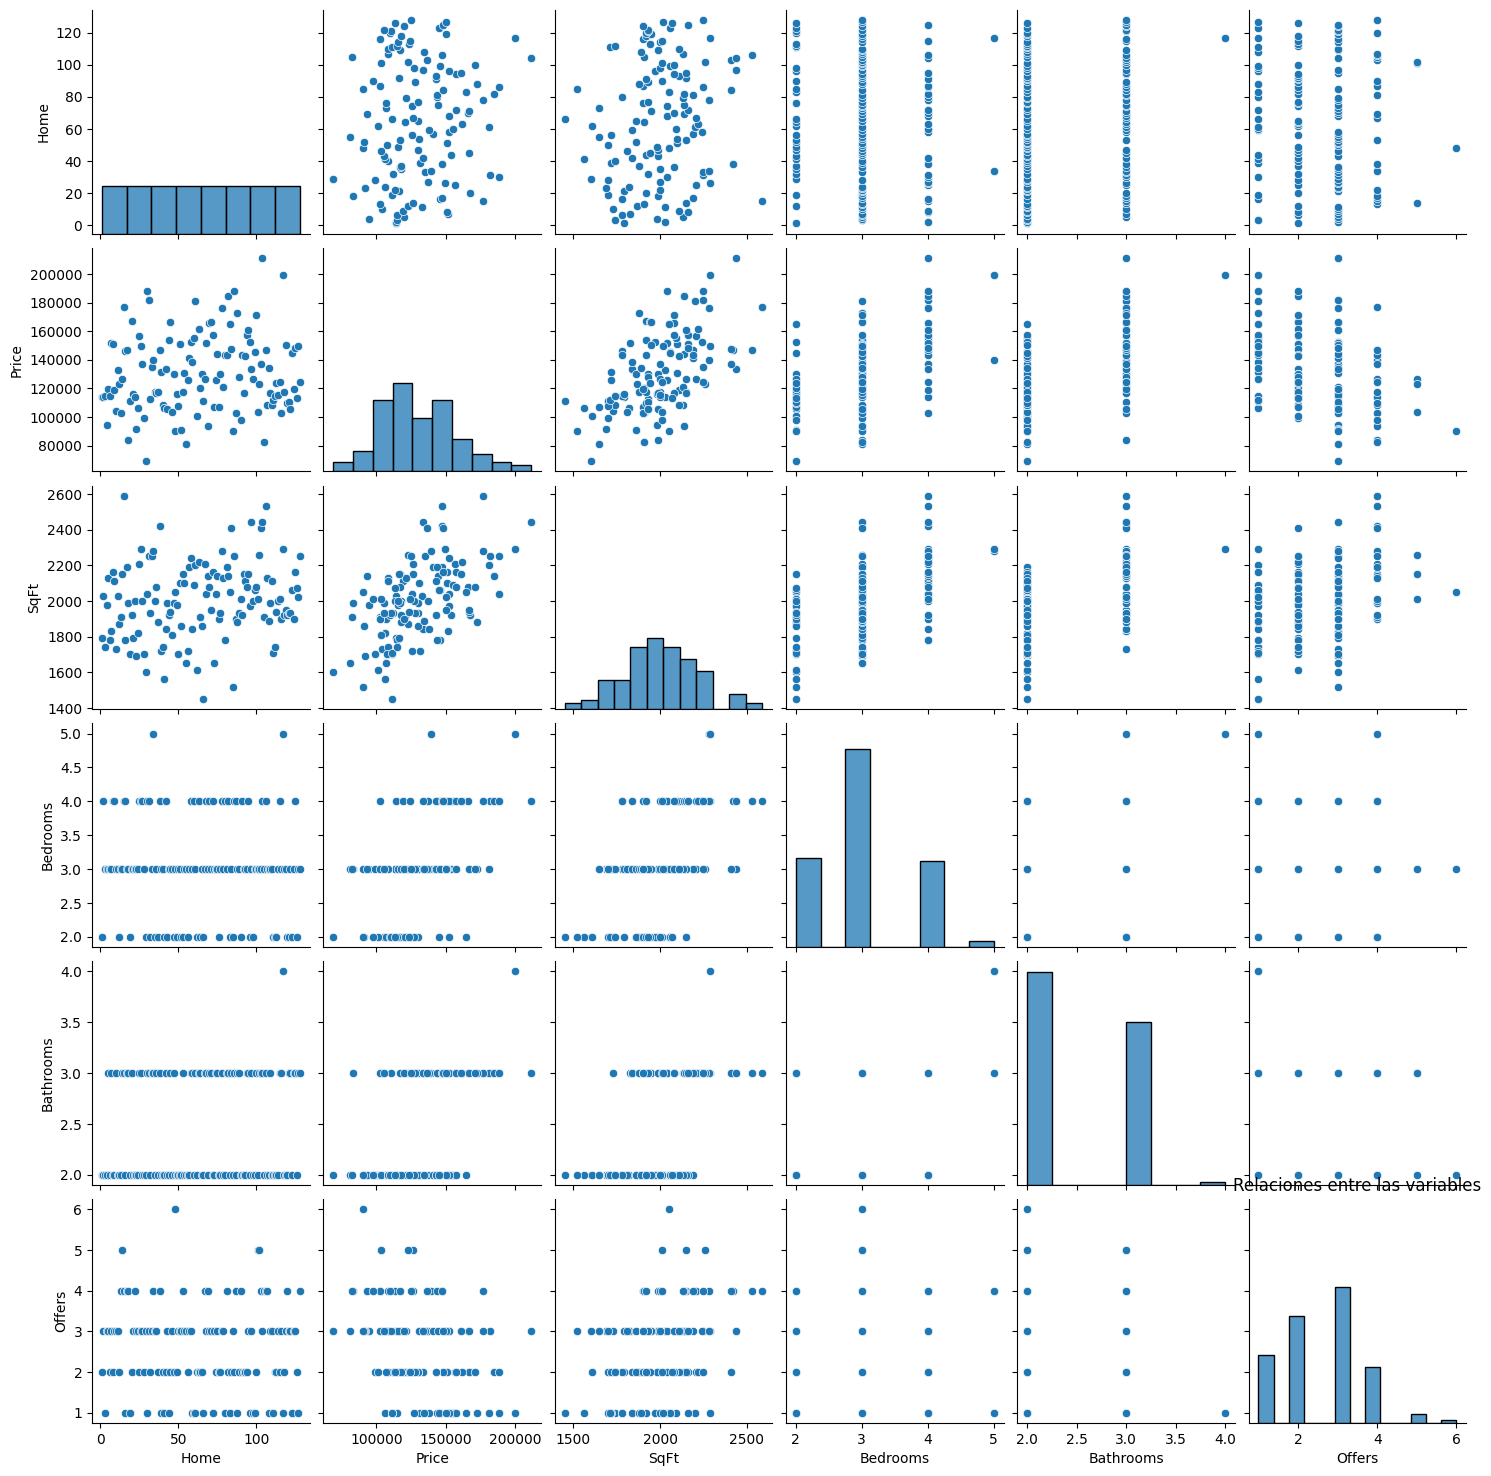

In [4]:

# Visualizar relaciones entre variables
sns.pairplot(data)
plt.title("Relaciones entre las variables")
plt.show()


## Preparación de datos

In [5]:

# Separar variables independientes (X) y dependiente (y)
X = data[['SqFt', 'Bedrooms', 'Bathrooms']]
y = data['Price']  # 'Price' should match the column name in the dataset exactly

# Dividir en conjuntos de entrenamiento (80%) y prueba (20%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Entrenamiento del modelo de regresión lineal

In [6]:

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## Evaluación del modelo

In [7]:

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluación del modelo:")
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R²): {r2}")



Evaluación del modelo:
Error Cuadrático Medio (MSE): 320149938.23026806
Coeficiente de Determinación (R²): 0.4568195777548879


## Predicción del precio de una nueva casa

In [8]:

# Predicción para una nueva casa
new_house = np.array([[2000, 3, 2]])  # Tamaño: 2000, Habitaciones: 3, Baños: 2
predicted_price = model.predict(new_house)

print(f"\nEl precio predicho para una casa de 2000 pies cuadrados, con 3 habitaciones y 2 baños es: ${predicted_price[0]:,.2f}")



El precio predicho para una casa de 2000 pies cuadrados, con 3 habitaciones y 2 baños es: $123,537.00


/Users/morkand/Desktop/MachineLearning/Core1/.venv/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
